## This final notebook investigates the sensitivity of Saturation pressure to CO2

In [ ]:
import VESIcal as v
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Lets load the composition of a Fuego melt inclusion, with 4 wt% water

In [2]:
Fuego_noCO2 =v.Sample({'SiO2': 49.67,
 'TiO2':     1.17,
 'Al2O3':    16.50,
 'Fe2O3':     1.653168,
 'FeO':       8.432,
 'MnO': 0.185898241,
 'MgO':      4.380435345,
 'CaO':      7.901059264,
 'Na2O':      3.372092032,
 'K2O':       0.79127506,
'P2O5':     0.22,
'CO2': 0,
'H2O': 4})

## Lets calculate a H2O-only pressure, e.g., say we were using plagioclase hygrometry

In [18]:
SatP_noCO2=v.calculate_saturation_pressure(sample=Fuego_noCO2, temperature=1000).result
SatP_noCO2

1310

## Lets say there is actually 1000 ppm CO2 in the glass phase, which we measure using SIMS..
- How much does the saturation pressure change?

In [4]:
## Now play around with adding varying amoutns of CO2#
# You can see, in arcs, mafic plag really shouldn't be used as a hygrometer
CO2_glass=1000

Fuego_CO2 =v.Sample({'SiO2': 49.67,
 'TiO2':     1.17,
 'Al2O3':    16.50,
 'Fe2O3':     1.653168,
 'FeO':       8.432,
 'MnO': 0.185898241,
 'MgO':      4.380435345,
 'CaO':      7.901059264,
 'Na2O':      3.372092032,
 'K2O':       0.79127506,
'P2O5':     0.22,
'CO2': CO2_glass/10000,
'H2O': 4})

SatP_CO2=v.calculate_saturation_pressure(sample=Fuego_CO2, temperature=1000).result
SatP_CO2

2850

## Now lets say there is also a certain amount of CO2 in the vapour bubble. 

In [5]:
## Now play around with adding varying amoutns of CO2#
# You can see, in arcs, mafic plag really shouldn't be used as a hygrometer
CO2_glass=1000
CO2_bubble=2000
Fuego_CO2 =v.Sample({'SiO2': 49.67,
 'TiO2':     1.17,
 'Al2O3':    16.50,
 'Fe2O3':     1.653168,
 'FeO':       8.432,
 'MnO': 0.185898241,
 'MgO':      4.380435345,
 'CaO':      7.901059264,
 'Na2O':      3.372092032,
 'K2O':       0.79127506,
'P2O5':     0.22,
'CO2': (CO2_glass+CO2_bubble)/10000,
'H2O': 4})

SatP_CO2=v.calculate_saturation_pressure(sample=Fuego_CO2, temperature=1000).result
SatP_CO2

5280

## Introducing forloops
- When Penny did the calcs for VESIcal II, she didnt do these calcs manually
- instead, you can set up forloops to consider a wide range of CO$_2$ content for different models.
- This method can be used to investigate sensitivity to a variety of things. You can find the scripts for VESIcal II here https://github.com/PennyWieser/VESIcal_II
- Investigating adding between 0 and 5000 ppm CO2 to a fixed melt composition (from Lowell Moore, Fuego) to see how much bubble CO2 affects saturation pressures

In [21]:
# Set up an array of CO2 contents. Here, have hand-typed to get a good spacing, could do with linspaces
CO2=np.array([0, 0.001, 0.002, 0.003, 0.005, 0.0075, 0.01, 0.015, 0.02, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])
# In python, your life is easiest if you set up empty containers tolater fill in
Psat_Fuego_MagmaSat_2=np.empty(len(CO2), dtype=float)
Psat_Fuego_Dixon_2=np.empty(len(CO2), dtype=float)
Psat_Fuego_Shish_2=np.empty(len(CO2), dtype=float)
Psat_Fuego_IM_H_2=np.empty(len(CO2), dtype=float)
Psat_Fuego_IM_A_2=np.empty(len(CO2), dtype=float)

# I'm just turning warnings off here as i'm likely to trigger calibration warnings
with w.catch_warnings():
    w.simplefilter('ignore')
    
    # Now, we loop through each CO2 content
    for i in range(0, len(CO2)):


    # EAch time through the loop, CO2 in the sample gets replaced with the CO2 from the np.array
        Fuego =v.Sample({'SiO2': 49.67,
     'TiO2':     1.17,
     'Al2O3':    16.50,
     'Fe2O3':     1.653168,
     'FeO':       8.432,
     'MnO': 0.185898241,
     'MgO':      4.380435345,
     'CaO':      7.901059264,
     'Na2O':      3.372092032,
     'K2O':       0.79127506,
    'P2O5':     0.22,
    'CO2': CO2[i],
    'H2O': 2}, default_normalization='none')
        # Then calculate PSat for each loop using diferent models
        Psat_Fuego_MagmaSat_2[i]=v.calculate_saturation_pressure(sample=Fuego,  temperature=1000).result
        Psat_Fuego_IM_H_2[i]=v.calculate_saturation_pressure(sample=Fuego, model='IaconoMarziano',  temperature=1000).result
        Psat_Fuego_IM_A_2[i]=v.calculate_saturation_pressure(sample=Fuego, model='IaconoMarziano',  coeffs="anhydrous",  temperature=1000).result
        Psat_Fuego_Dixon_2[i]=v.calculate_saturation_pressure(sample=Fuego, model='Dixon',  temperature=1000).result
        Psat_Fuego_Shish_2[i]=v.calculate_saturation_pressure(sample=Fuego, model='ShishkinaIdealMixing',  temperature=1000).result

653e-13, iter = 37
duanH2ODriver(b): t = 1273.15, p = 6880, z = 1.68393, v = 2.59089, delv = 0, dx = -1.09653e-13, iter = 37
duanH2ODriver(b): t = 1273.15, p = 6880, z = 1.68393, v = 2.59089, delv = 0, dx = -1.09653e-13, iter = 37
duanH2ODriver(b): t = 1273.15, p = 6880, z = 1.68393, v = 2.59089, delv = 0, dx = -1.09653e-13, iter = 37
duanH2ODriver(b): t = 1273.15, p = 6880, z = 1.68393, v = 2.59089, delv = 0, dx = -1.09653e-13, iter = 37
duanH2ODriver(b): t = 1273.15, p = 6880, z = 1.68393, v = 2.59089, delv = 0, dx = -1.09653e-13, iter = 37
duanH2ODriver(b): t = 1273.15, p = 6880, z = 1.68393, v = 2.59089, delv = 0, dx = -1.09653e-13, iter = 37
duanH2ODriver(b): t = 1273.15, p = 6880, z = 1.68393, v = 2.59089, delv = 0, dx = -1.09653e-13, iter = 37
duanH2ODriver(b): t = 1273.15, p = 6880, z = 1.68393, v = 2.59089, delv = 0, dx = -1.09653e-13, iter = 37
duanH2ODriver(b): t = 1273.15, p = 6880, z = 1.68393, v = 2.59089, delv = 0, dx = -1.09653e-13, iter = 37
duanH2ODriver(b): t = 1273.

## Magmasat has a resolution of 10 MPa, can cause bounciness, so we perform a polynomial fit

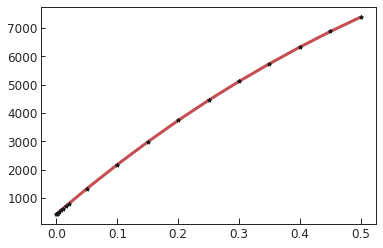

In [22]:
plt.fill_between(CO2, Psat_Fuego_MagmaSat_2-10, Psat_Fuego_MagmaSat_2+10, color='grey', alpha=0.2)
Pf_Magmasat_2 = np.poly1d(np.polyfit(CO2[0:],  Psat_Fuego_MagmaSat_2[0:], 8))
Px_new_Magmasat_2 = CO2
Py_new_Magmasat_2 = Pf_Magmasat_2(Px_new_Magmasat_2)
plt.plot(Px_new_Magmasat_2, Py_new_Magmasat_2, '-r')
plt.plot(CO2, Psat_Fuego_MagmaSat_2, '*k', markersize=4)

Text(0, 0.5, 'Saturation Pressure (kbar)')

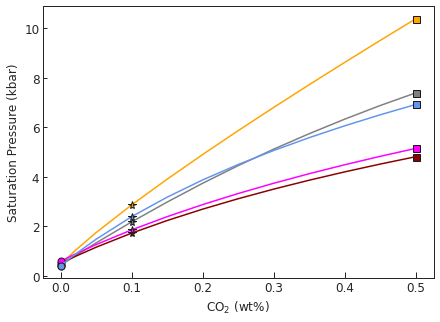

In [13]:
# Figure for all 3 CO2 contents
b=1.5
fig, (ax1) = plt.subplots(1,1, figsize=(7, 5), sharex=True) # adjust dimensions of figure here

ax1.plot(Px_new_Magmasat_2, 0.001*Py_new_Magmasat_2, '-', color='grey', linewidth=b)
ax1.plot(Px_new_Magmasat_2[0], 0.001*Py_new_Magmasat_2[0], 'ok', mfc='grey', markersize=7)

ax1.plot(Px_new_Magmasat_2[-1], 0.001*Py_new_Magmasat_2[-1], 'sk', mfc='grey', markersize=7)

ax1.plot(CO2, 0.001*Psat_Fuego_Shish_2, '-', color='orange', linewidth=b)
ax1.plot(CO2[0], 0.001*Psat_Fuego_Shish_2[0], 'ok', mfc='orange', markersize=7)
ax1.plot(CO2[-1], 0.001*Psat_Fuego_Shish_2[-1], 'sk', mfc='orange', markersize=7)


ax1.plot(CO2, 0.001*Psat_Fuego_IM_A_2, '-', color='darkred', linewidth=b)
ax1.plot(CO2[0], 0.001*Psat_Fuego_IM_A_2[0], 'ok', mfc='darkred', markersize=7)
ax1.plot(CO2[-1], 0.001*Psat_Fuego_IM_A_2[-1], 'sk', mfc='darkred', markersize=7)


ax1.plot(CO2, 0.001*Psat_Fuego_IM_H_2, '-', color='magenta', linewidth=b)
ax1.plot(CO2[0], 0.001*Psat_Fuego_IM_H_2[0], 'ok', mfc='magenta', markersize=7)
ax1.plot(CO2[-1], 0.001*Psat_Fuego_IM_H_2[-1], 'sk', mfc='magenta', markersize=7)



ax1.plot(CO2, 0.001*Psat_Fuego_Dixon_2, '-', color='cornflowerblue', linewidth=b)
ax1.plot(CO2[0], 0.001*Psat_Fuego_Dixon_2[0], 'ok', mfc='cornflowerblue', markersize=7)
ax1.plot(CO2[-1], 0.001*Psat_Fuego_Dixon_2[-1], 'sk', mfc='cornflowerblue', markersize=7)

# 1000 ppm ones so ontop
star=10
ax1.plot(Px_new_Magmasat_2[star], 0.001*Py_new_Magmasat_2[star], '*k', mfc='grey', markersize=8, lw=0.5)
ax1.plot(CO2[star], 0.001*Psat_Fuego_Shish_2[star], '*k', mfc='orange', markersize=8, lw=0.5)
ax1.plot(CO2[star], 0.001*Psat_Fuego_IM_A_2[star], '*k', mfc='darkred', markersize=8, lw=0.5)
ax1.plot(CO2[star], 0.001*Psat_Fuego_IM_H_2[star], '*k', mfc='magenta', markersize=8, lw=0.5)
ax1.plot(CO2[star], 0.001*Psat_Fuego_Dixon_2[star], '*k', mfc='cornflowerblue', markersize=8, lw=0.5)


ax1.set_xlabel('CO$_2$ (wt%)')
ax1.set_ylabel('Saturation Pressure (kbar)')

## Measure your bubbles!!!!